<a href="https://colab.research.google.com/github/porgill-prosper/airflow/blob/master/Perceptron_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Perceptron</h1>

PyTorch


In [0]:
#!pip3 install torch

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [0]:
n_pts = 500
x, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=.1, factor=.2)
#print(x,y)
x_data = torch.Tensor(x)
y_data = torch.Tensor(y.reshape(500,1))

In [0]:
def scatter_plot():
  plt.scatter(x[y==0, 0], x[y==0, 1])
  plt.scatter(x[y==1, 0], x[y==1, 1])

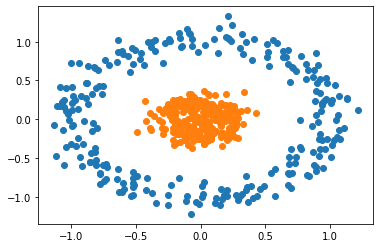

In [18]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_sise, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_sise, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0
    

In [19]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

TypeError: ignored

In [0]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(),  b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  #0 = w1x1 + w2x2 + b
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

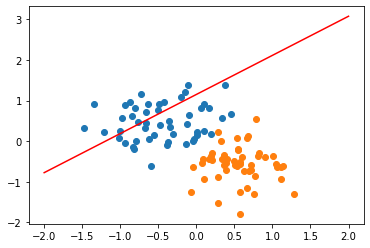

In [10]:
plot_fit('Initial Model')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [12]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch: ", i, "Loss: ", loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch:  0 Loss:  0.6185115575790405
epoch:  1 Loss:  0.6174639463424683
epoch:  2 Loss:  0.6164201498031616
epoch:  3 Loss:  0.6153794527053833
epoch:  4 Loss:  0.614342451095581
epoch:  5 Loss:  0.6133086681365967
epoch:  6 Loss:  0.6122783422470093
epoch:  7 Loss:  0.6112515330314636
epoch:  8 Loss:  0.6102280616760254
epoch:  9 Loss:  0.6092080473899841
epoch:  10 Loss:  0.6081910729408264
epoch:  11 Loss:  0.6071775555610657
epoch:  12 Loss:  0.606167733669281
epoch:  13 Loss:  0.6051608920097351
epoch:  14 Loss:  0.604157567024231
epoch:  15 Loss:  0.6031574606895447
epoch:  16 Loss:  0.602160632610321
epoch:  17 Loss:  0.6011670827865601
epoch:  18 Loss:  0.6001767516136169
epoch:  19 Loss:  0.599189817905426
epoch:  20 Loss:  0.5982059240341187
epoch:  21 Loss:  0.5972254276275635
epoch:  22 Loss:  0.5962479114532471
epoch:  23 Loss:  0.5952739119529724
epoch:  24 Loss:  0.5943028926849365
epoch:  25 Loss:  0.5933352112770081
epoch:  26 Loss:  0.5923705101013184
epoch:  27 Loss:

Text(0, 0.5, 'loss')

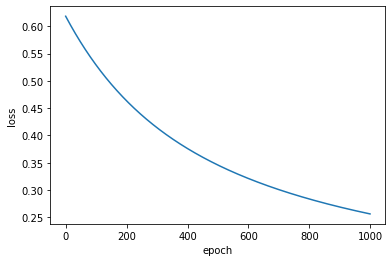

In [13]:
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')

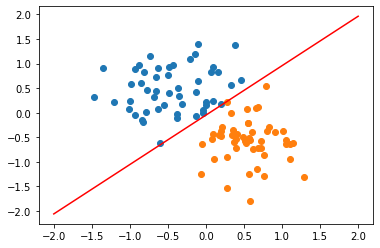

In [14]:
plot_fit('Trained Model')

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Red point in class = 1
Black point in class = 0


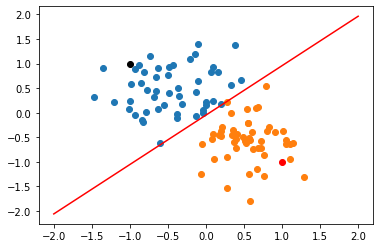

In [15]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))
print("Red point in class = {}".format(model.predict(point1)))
print("Black point in class = {}".format(model.predict(point2)))

plot_fit('Trained Model')